# More On Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

You will be able to:

* Use various techniques for dealing with missing data
* Observe the impact of imputing missing values on summary statistics

## Load the Data

To start, load in the dataset `titanic.csv` using pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('titanic.csv')


## Use the `.info()` Method to Quickly Preview Which Features Have Missing Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Unnamed: 0     891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Observe Previous Measures Of Centrality

Let's look at the age feature. Calculate the mean, median and standard deviation of this feature. Then plot a histogram of the distribution.

mean      29.699118
median    28.000000
std       14.526497
Name: Age, dtype: float64

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

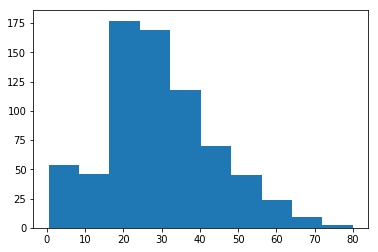

In [3]:
# Use .agg() to get mean, med, and std of 'Age'

display(df.Age.agg(['mean', 'median', 'std']))

plt.hist(df.Age)

## Impute Missing Values using the Mean 

Fill the missing age values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

mean      29.699118
median    29.699118
std       13.002015
Name: Age, dtype: float64

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

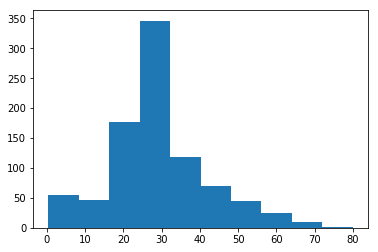

In [4]:
df2 = df.Age.fillna(df.Age.mean())

display(df2.agg(['mean', 'median', 'std']))

plt.hist(df2)

### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute Missing Values using the Median 

Fill the missing age values, this time using the media age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

mean      29.361582
median    28.000000
std       13.019697
Name: Age, dtype: float64

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

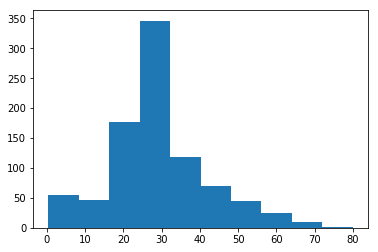

In [5]:
df3 = df.Age.fillna(df.Age.median())

display(df3.agg(['mean', 'median', 'std']))

plt.hist(df3)

### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping Rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

mean      29.699118
median    28.000000
std       14.526497
Name: Age, dtype: float64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

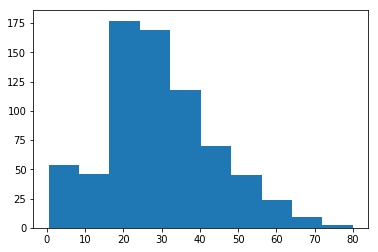

In [7]:
df4 = df.Age.dropna(axis=0, how='any')

display(df4.agg(['mean', 'median', 'std']))

plt.hist(df4)

### Commentary

Dropping null values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.